# KNN

In [6]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [8]:
data = pd.read_csv("semeion.data", sep='\s+', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
X = data
num = range(256, 266)
X = X.drop(num, axis=1)
X.shape

(1593, 256)

In [11]:
ind = range(0, 10)
col = dict(zip(num, ind))
Y_data = pd.DataFrame(data.iloc[:, num])
Y_data.rename(columns=col, inplace=True)
Y_data.shape

(1593, 10)

In [12]:
Y_data.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [13]:
Y_data['n'] = Y_data.apply(lambda x: Y_data.columns[x.idxmax()], axis=1)

In [14]:
Y_data.head()

,0,1,2,3,4,5,6,7,8,9,n
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [15]:
Y = Y_data['n']
Y.tail()

1588    9
1589    9
1590    9
1591    9
1592    9
Name: n, dtype: int64

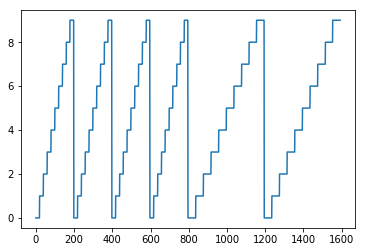

In [16]:
plt.plot(Y)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=5)

In [34]:
X_train.shape

(1274, 256)

In [35]:
Y_train.shape

(1274,)

In [36]:
X_test.shape

(319, 256)

In [37]:
Y_test.shape

(319,)

In [38]:
n_neighbors_array = range(2,16)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.1161695447409733 3


Text(69,0.5,'Actual')

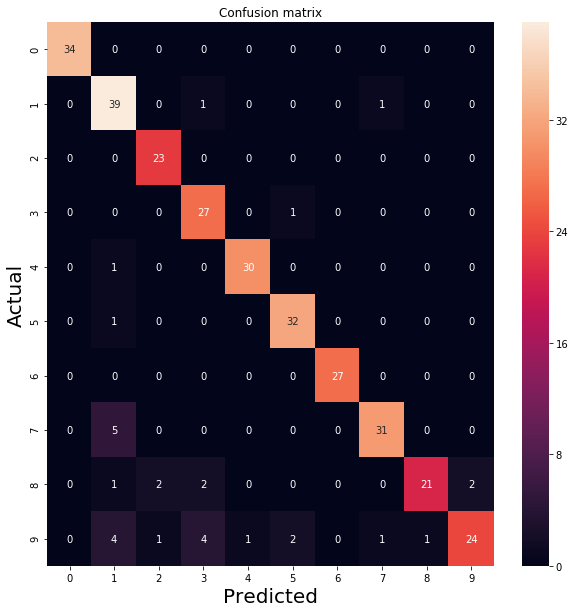

In [39]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
df_cm = pd.DataFrame(
    cm, index=[i for i in labels], columns=[i for i in labels])
plt.figure(figsize=(10, 10))

sns.heatmap(df_cm, annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [40]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.76      0.95      0.85        41
          2       0.88      1.00      0.94        23
          3       0.79      0.96      0.87        28
          4       0.97      0.97      0.97        31
          5       0.91      0.97      0.94        33
          6       1.00      1.00      1.00        27
          7       0.94      0.86      0.90        36
          8       0.95      0.75      0.84        28
          9       0.92      0.63      0.75        38

avg / total       0.91      0.90      0.90       319



Text(0,0.5,'Предсказанные цифры')

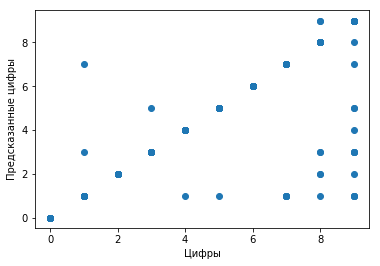

In [41]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Цифры")
plt.ylabel("Предсказанные цифры")